In [1]:
# Author: Thiago Akio Nakamura
# E-mail: akionakas@gmail.com

# Import necessary classes and libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib as mpl
import pickle
from fdd import OperationMode
from fdd import FDD

import scipy.io
from scipy import linalg
from sklearn.datasets import make_blobs
from sklearn.mixture import PGMM
from scipy.stats import randint as sp_randint

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import brier_score_loss
from sklearn.calibration import CalibratedClassifierCV
from sklearn.cross_validation import train_test_split
from matplotlib.colors import LogNorm
from sklearn.grid_search import GridSearchCV
from time import time

In [2]:
# Load Tennessee Eastman Process Data
original_data = pickle.load( open( "data/tep_data.dat", "rb" ) )
original_normal_data = original_data["Normal"]
original_normal_data.shape

(721, 22)

In [3]:
def create_dynamic_data(data, delays):
    final_data = data
    for delay in delays:
        b = np.roll(data, delay, axis=0)
        final_data = np.hstack((final_data, b))
    return final_data[np.max(delays):, :]

In [4]:
complete_data = original_data
# delays = [1]
# for key in original_data:
#     complete_data[key] = create_dynamic_data(original_data[key], delays)
x_normal = complete_data["Normal"]

In [5]:
fdd = FDD(name='TEPFDD',
          training_type='spark',
          n_components=np.array([1, 2, 3, 4, 5, 6, 7, 8]),
          n_pc=np.array([14]),
          covar_types=np.array([7]),
          n_jobs=16)
stats=fdd.fdd(x_normal)

There is no model registered, creating a normal one.


0
Normal operation condition detected.


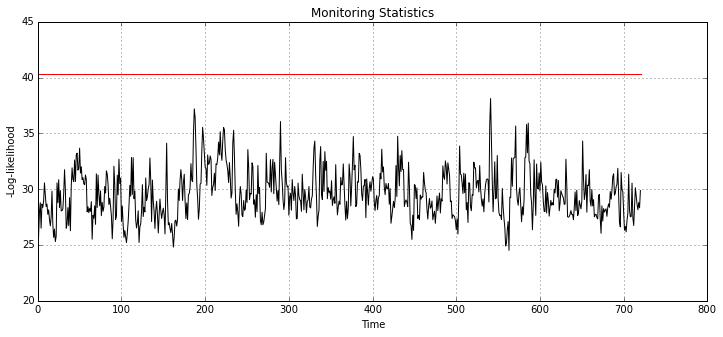

In [6]:
stats, tr = fdd.fdd(x_normal)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

619
Out of normal operation condition detected.
The best fitting model found was: Normal Condition
True
619
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=1, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
1.0
619
Out of normal operation condition detected.
The best fitting model found was: Fault1
True
105
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=7, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.169628432956


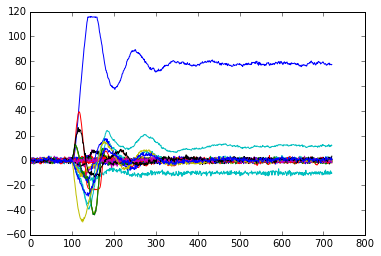

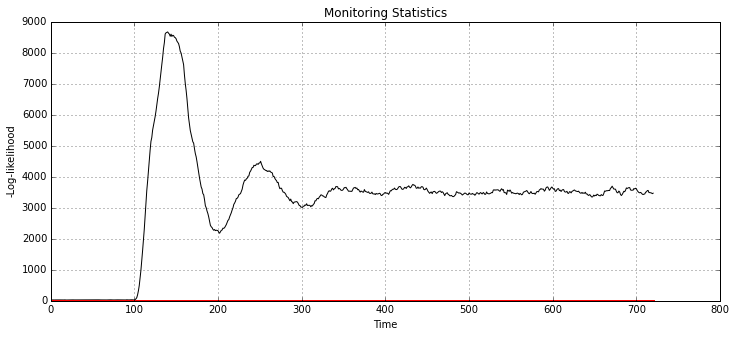

In [7]:
x_fault = complete_data["Fault1"]   
plt.plot(x_fault)
fdd.fdd(x_fault)
stats, tr = fdd.fdd(x_fault)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

614
Out of normal operation condition detected.
The best fitting model found was: Normal Condition
True
614
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=1, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
1.0
614
Out of normal operation condition detected.
The best fitting model found was: Fault3
True
265
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.431596091205


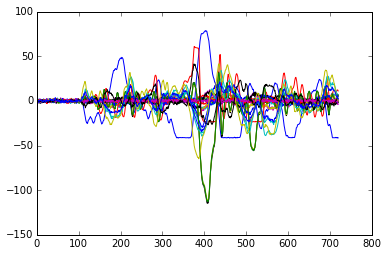

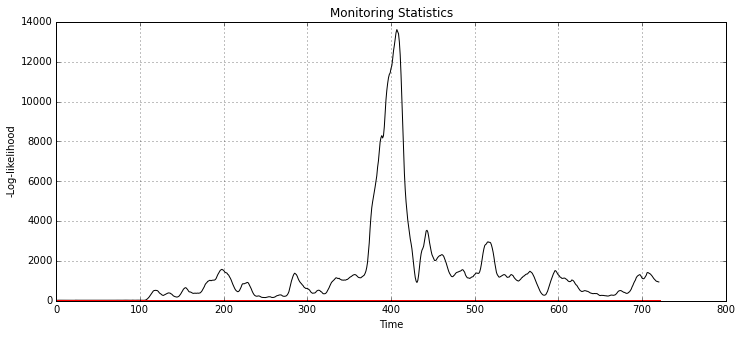

In [8]:
x_fault = complete_data["Fault8"]   
plt.plot(x_fault)
fdd.fdd(x_fault)
stats, tr = fdd.fdd(x_fault)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

536
Out of normal operation condition detected.
The best fitting model found was: Fault3
True
462
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.861940298507
536
Out of normal operation condition detected.
The best fitting model found was: Fault5
False
1
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=4, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)


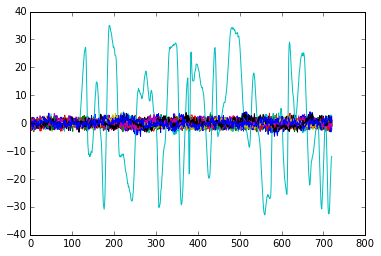

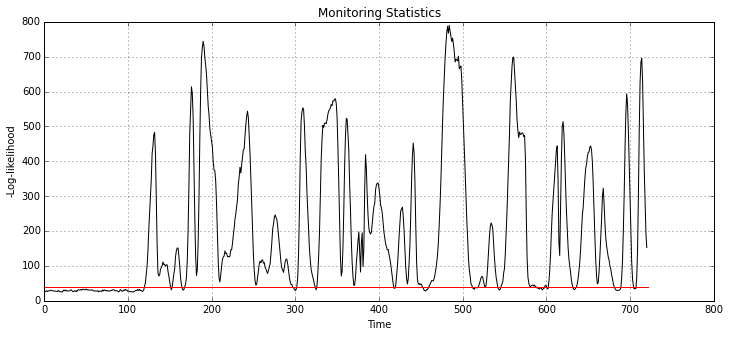

In [9]:
x_fault = complete_data["Fault10"]   
plt.plot(x_fault)
fdd.fdd(x_fault)
stats, tr = fdd.fdd(x_fault)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

255
Out of normal operation condition detected.
The best fitting model found was: Fault3
True
53
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.207843137255
255
Out of normal operation condition detected.
The best fitting model found was: Fault6
False
3
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=2, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)


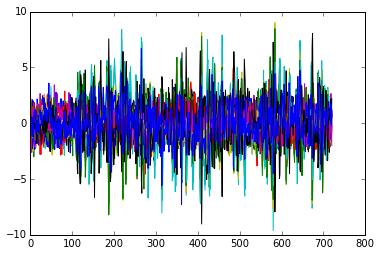

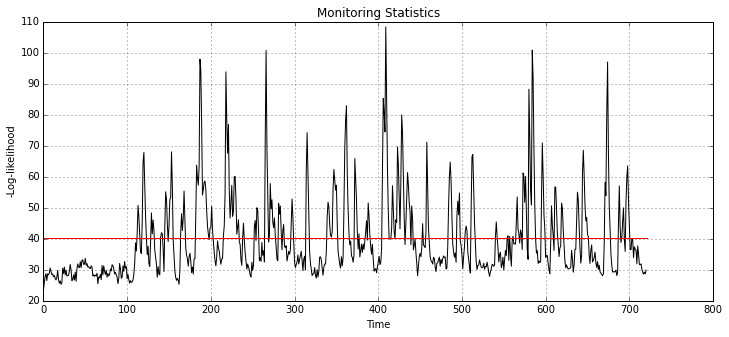

In [10]:
x_fault = complete_data["Fault12"]   
plt.plot(x_fault)
fdd.fdd(x_fault)
stats, tr = fdd.fdd(x_fault)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

610
Out of normal operation condition detected.
The best fitting model found was: Fault3
True
587
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.962295081967
610
Out of normal operation condition detected.
The best fitting model found was: Fault3
True
587
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.962295081967


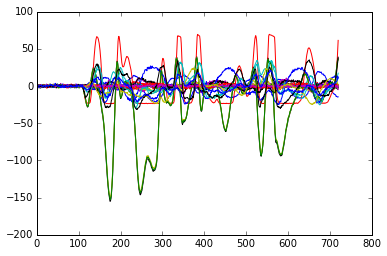

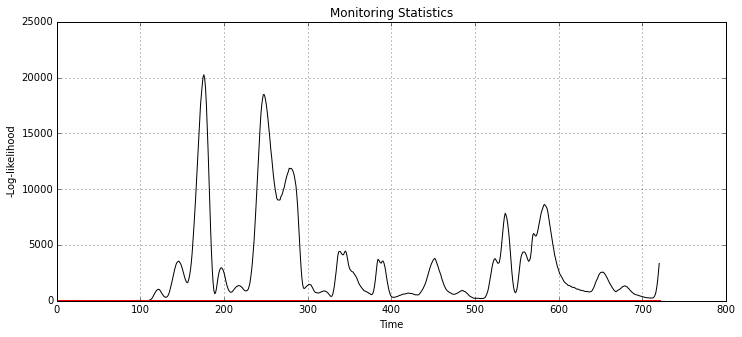

In [11]:
x_fault = complete_data["Fault13"]   
plt.plot(x_fault)
fdd.fdd(x_fault)
stats, tr = fdd.fdd(x_fault)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

618
Out of normal operation condition detected.
The best fitting model found was: Fault3
True
617
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.998381877023
618
Out of normal operation condition detected.
The best fitting model found was: Fault9
False
0
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)


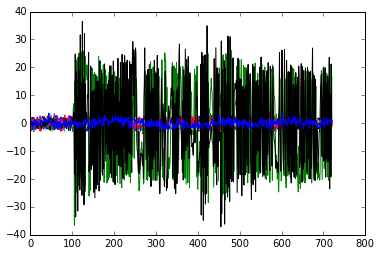

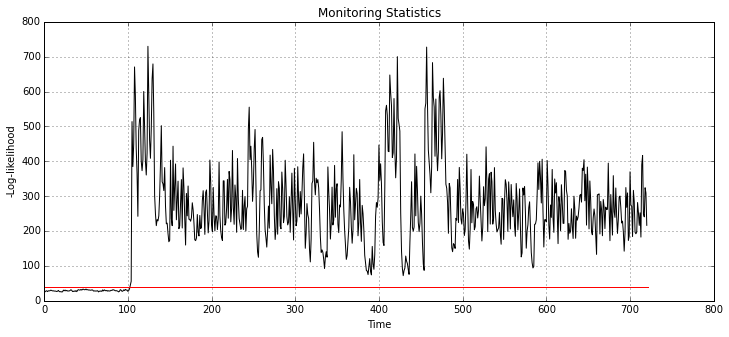

In [12]:
x_fault = complete_data["Fault14"]   
plt.plot(x_fault)
fdd.fdd(x_fault)
stats, tr = fdd.fdd(x_fault)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

605
Out of normal operation condition detected.
The best fitting model found was: Fault9
True
597
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.986776859504
605
Out of normal operation condition detected.
The best fitting model found was: Fault10
True
420
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=8, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.694214876033


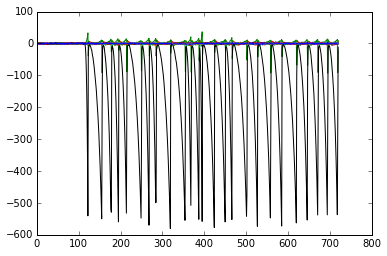

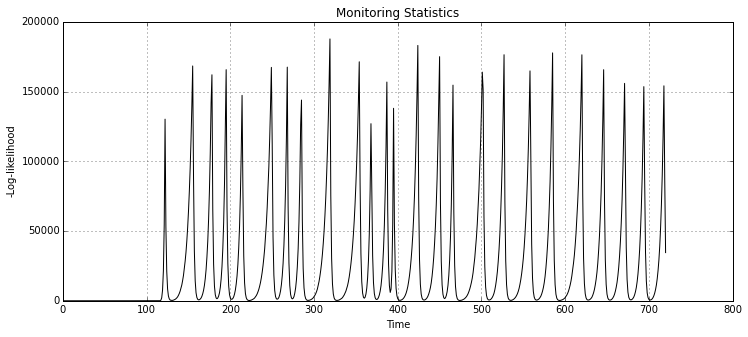

In [13]:
x_fault = complete_data["Fault17"]   
plt.plot(x_fault)
fdd.fdd(x_fault)
stats, tr = fdd.fdd(x_fault)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

295
Out of normal operation condition detected.
The best fitting model found was: Fault3
True
225
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.762711864407
295
Out of normal operation condition detected.
The best fitting model found was: Fault12
False
4
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=2, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)


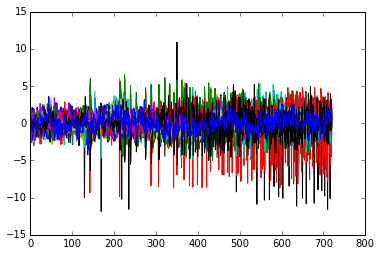

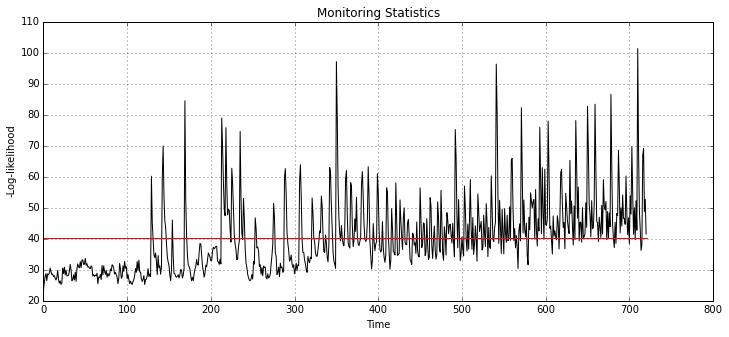

In [14]:
x_fault = complete_data["Fault19"]   
plt.plot(x_fault)
fdd.fdd(x_fault)
stats, tr = fdd.fdd(x_fault)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

595
Out of normal operation condition detected.
The best fitting model found was: Fault3
True
555
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=6, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.932773109244
595
Out of normal operation condition detected.
The best fitting model found was: Fault13
True
52
PGMM(covariance_type='UUR', init_params='wmpn', min_covar=1e-07,
   n_components=4, n_init=1, n_iter=100, n_pc=14, params='wmpn',
   random_state=None, tol=1e-06, verbose=0)
Unrecognized behaviour, training a new model.
0.0873949579832


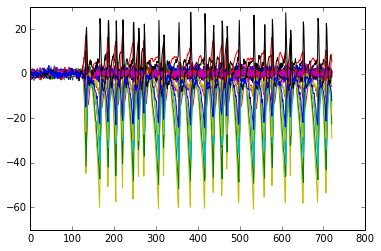

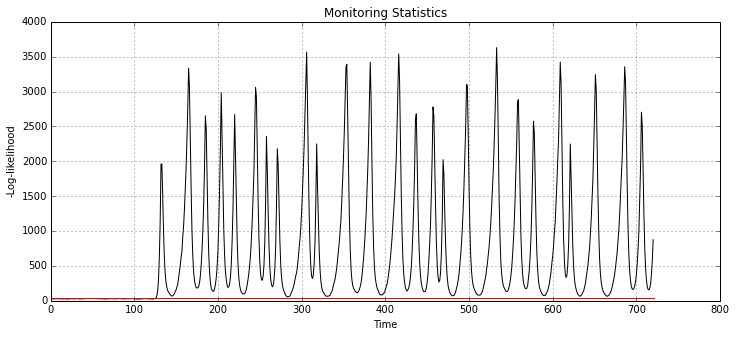

In [15]:
x_fault = complete_data["Fault20"]   
plt.plot(x_fault)
fdd.fdd(x_fault)
stats, tr = fdd.fdd(x_fault)
plt.figure(figsize=(12, 5))
plt.plot(stats, color = 'black')
plt.plot((1, stats.shape[0]), (tr, tr), color = 'red')
plt.title('Monitoring Statistics')
plt.ylabel('-Log-likelihood')
plt.xlabel('Time')
plt.grid()
plt.show()

In [16]:
for key in complete_data:
    print key

Fault18
Fault19
Normal
Fault10
Fault12
Fault13
Fault14
Fault17
Fault2
Fault1
Fault20
Fault8
